# Pandas Basic - Data Analysis

Summary - Data Analysis using python. We are doing an Exploratory data Analysis on sample dataset 'Birth_dataset' in this jupyter notebook.

1) Importing pandas / dataset.

2) Checking null values in this dataset.

3) Exploratory data analysis using describe, info functions.

4) Exploratory data Visualization using Seaborn and matplotlib functions.


In [1]:
import pandas as pd
df=pd.read_excel("Birth_dataset.xlsx")

In [2]:
df.isnull().sum()   # Checking Null Values

year        0
month       0
day       480
gender      0
births      0
dtype: int64

1) 480 null values in Day Column. 

In [3]:
df.describe()  # Describe function to give statistical insights on the continous variables.

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [4]:
df.info() #info function to give an insight on the number of entries in this datasets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15067 non-null float64
gender    15547 non-null object
births    15547 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [5]:
df.head()    # head function gives the first few observations in the dataset.

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
# df['year'] = df['year'].astype('category')
# df['month'] = df['month'].astype('category')
# df['day'] = df['day'].astype('category')
# df['gender'] = df['gender'].astype('category')

# here we are converting all the categorical columns into category.

In [7]:
df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [8]:
Columns_list=list(df.columns.values)
print("Unique Values in each Columns")

for col in Columns_list:
    print(col,":",df[col].nunique())

# This code snippets provide the number of unique elements in each column.

Unique Values in each Columns
year : 40
month : 12
day : 32
gender : 2
births : 3137


## Data Analysis using pivot tables.

In [9]:
pd.pivot_table(df,values='births',index='year',aggfunc='sum',margins=True).sort_values('births',ascending=True).head(5)

,births
year,
1973,3146125
1975,3153556
1974,3170631
1976,3176476
1972,3266235


2) Minimum number of babies born in year 1973, followed by in 1975

In [10]:
pd.pivot_table(df,values='births',index='year',aggfunc='sum',margins=True).sort_values('births').sort_values('births',ascending=False).head(5)

,births
year,
All,151774378
2007,4324008
2006,4273225
2008,4255156
1990,4162917


3) Maximum number of babies born in 2007, followed by in 2006

In [11]:
pd.pivot_table(df,values='births',index='gender',aggfunc='sum',margins=True)

,births
gender,
F,74035823
M,77738555
All,151774378


4) Males outnumber females.

# Data Visualization using Python

In [12]:
pd.pivot_table(df,values='births',index='year',columns='gender',aggfunc='sum').plot(figsize=(20,5))

# Males outnumbers females on all year.

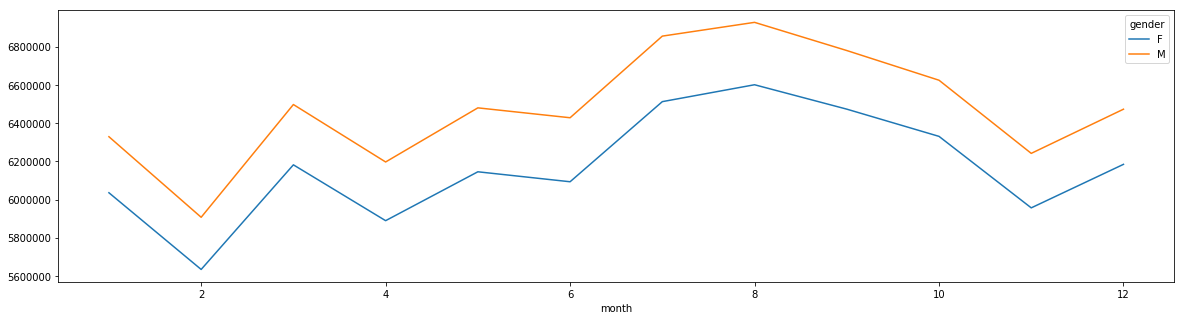

In [13]:
pd.pivot_table(df,values='births',index='month',columns='gender',aggfunc='sum').plot(figsize=(20,5))

# More Babies are born in month of August

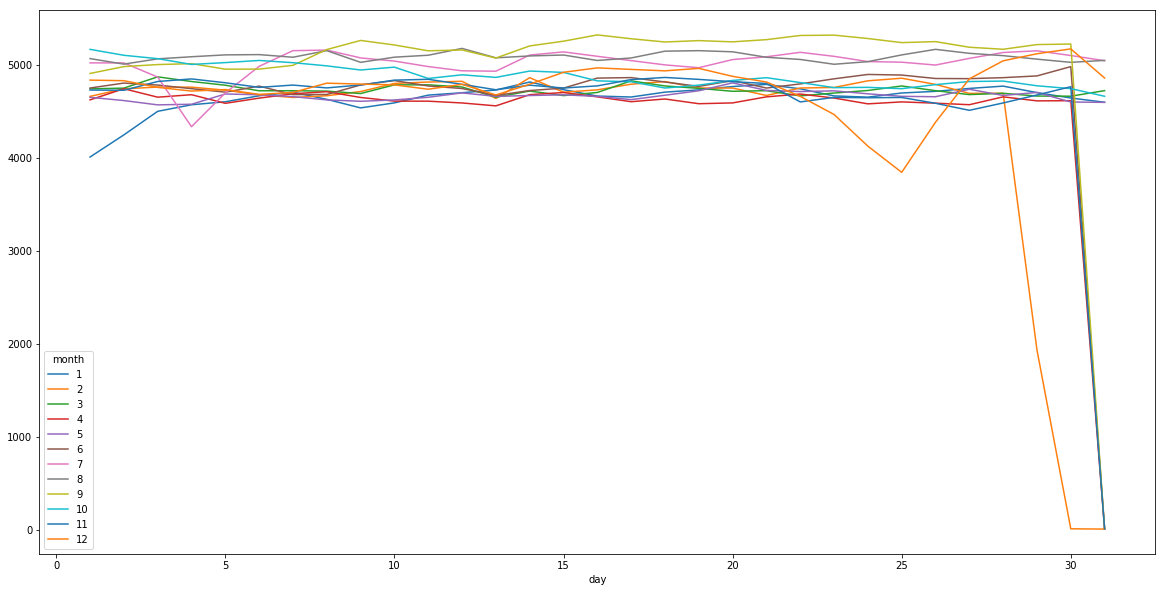

In [14]:
pd.pivot_table(df[df.day!=99],values='births',index='day',columns='month',aggfunc='mean',margins=False).plot(figsize=(20,10))

## More babies have birthday as 16th August, (unusual)

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

In [16]:
sns.set(style="darkgrid")

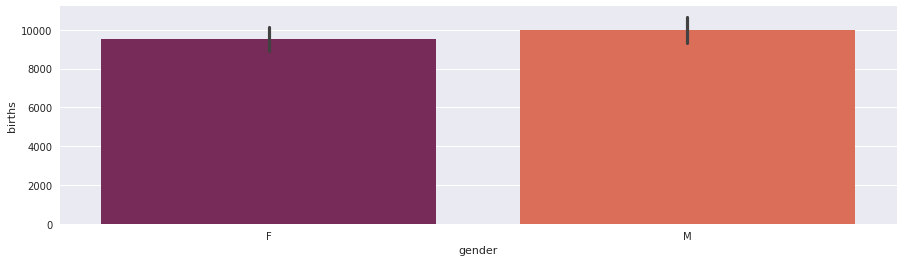

In [17]:
plt.figure(figsize=(15,4))
sns.barplot(x=df['gender'], y=df['births'], palette="rocket")

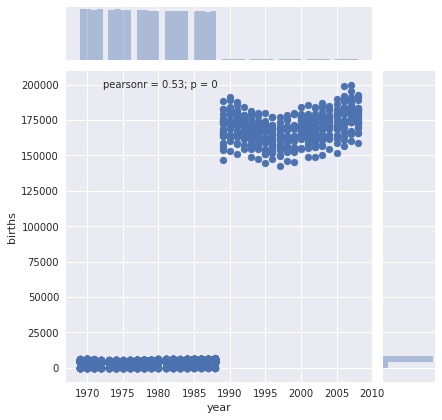

In [18]:
plt.figure(figsize=(15,4))
sns.jointplot(x='year', y='births',data=df)

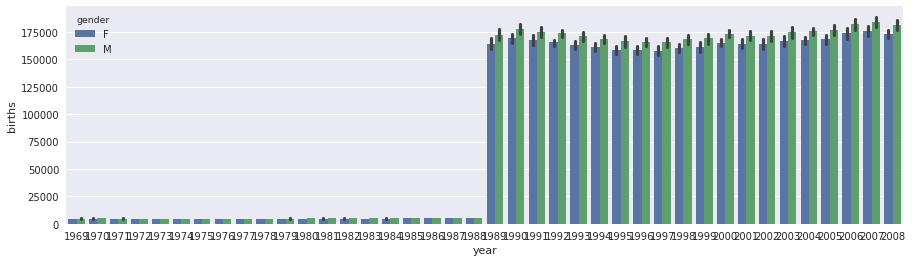

In [19]:
plt.figure(figsize=(15,4))
sns.barplot(x="year", y="births", hue="gender", data=df)

## Apparently this graph doesnt seem quite right. Hence we could reshape the data.

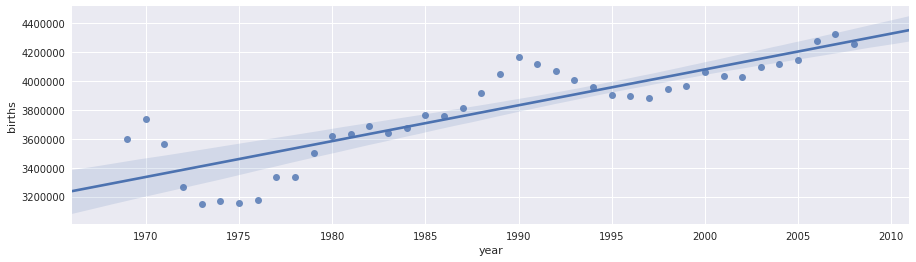

In [20]:
df_new=pd.pivot_table(df,values='births',index='year',aggfunc='sum').reset_index().rename_axis(None, axis=1)
plt.figure(figsize=(15,4))
sns.regplot(x='year',y='births',data=df_new)

Here we make use of advanced plotting library Seaborn for plotting the regression line of brith in each year, and as mentioned the birth rate is increasing at a steady rate.